In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, precision_recall_curve, recall_score, roc_curve, auc, confusion_matrix
from sklearn.datasets import load_svmlight_file
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = load_svmlight_file('data/demo-g1.txt')
X,y=data[0],data[1]
X.shape
X_s,y_s=resample(X,y,n_samples=10000,replace=False)
X_train,X_test,y_train,y_test=train_test_split(X_s,y_s,test_size=.3,random_state=42)

In [3]:
lr_clf = LogisticRegression(penalty='l1')

In [4]:
bagging_clf=BaggingClassifier(base_estimator=lr_clf,n_estimators=200,max_samples=.3,max_features=.3,bootstrap_features=True,n_jobs=-1,verbose=1)

In [5]:
bagging_clf.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   57.1s remaining:   57.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.2min finished


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=True, max_features=0.3,
         max_samples=0.3, n_estimators=200, n_jobs=-1, oob_score=False,
         random_state=None, verbose=1, warm_start=False)

In [6]:
def model_eva(model,X_test,y_test):
    y_test_pred_proba=model.predict_proba(X_test)
    y_test_pred=model.predict(X_test)
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred_proba[:,0],pos_label=1)
    print('precision_score:',precision_score(y_test,y_test_pred))
    print('auc:',auc(fpr,tpr))
    print(confusion_matrix(y_test,y_test_pred).T)
    plt.plot(fpr,tpr)
    plt.xlabel('fpt')
    plt.ylabel('tpr')
    plt.title('RoC')
def model_eva_hard(model,X_test,y_test):
    y_test_pred=model.predict(X_test)
    print('precision_score:',precision_score(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred).T)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.6s finished


precision_score: 0.6498781478472786
auc: 0.7550668483449356
[[1600  862]
 [ 161  377]]


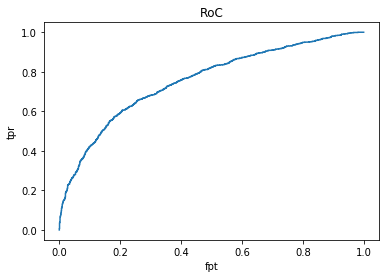

In [9]:
model_eva(bagging_clf,X_test,y_test)